In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load data from BigQuery
import sys
sys.path.append('../Data')
from bigquery_loader import load_cleaned_data

df = load_cleaned_data()

Loading cleaned data from BigQuery...
✓ Loaded 21096 rows, 20 columns


In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),18.75,53.15,0
1,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,56.00,0
2,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25,0
3,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,0
4,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.20,0


In [5]:
## Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            21096 non-null  object 
 1   SeniorCitizen     21096 non-null  Int64  
 2   Partner           21096 non-null  object 
 3   Dependents        21096 non-null  object 
 4   tenure            21096 non-null  Int64  
 5   PhoneService      21096 non-null  object 
 6   MultipleLines     21096 non-null  object 
 7   InternetService   21096 non-null  object 
 8   OnlineSecurity    21096 non-null  object 
 9   OnlineBackup      21096 non-null  object 
 10  DeviceProtection  21096 non-null  object 
 11  TechSupport       21096 non-null  object 
 12  StreamingTV       21096 non-null  object 
 13  StreamingMovies   21096 non-null  object 
 14  Contract          21096 non-null  object 
 15  PaperlessBilling  21096 non-null  object 
 16  PaymentMethod     21096 non-null  object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,21096.0,21096.0,21096.000000,21096.000000,21096.0
mean,0.1624,32.421786,64.798208,2283.300441,0.265785
std,0.368827,24.544096,30.084548,2266.663904,0.441761
min,0.0,1.0,18.250000,18.800000,0.0
25%,0.0,9.0,35.587500,401.450000,0.0
50%,0.0,29.0,70.350000,1397.475000,0.0
75%,0.0,55.0,89.862500,3794.737500,1.0
max,1.0,72.0,118.750000,8684.800000,1.0


In [7]:
df.shape

(21096, 20)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Duplicated Records
df.duplicated().sum()

np.int64(14086)

## Exploritory Data Analysis

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

We have 15 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [12]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64
---------------------------
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64
---------------------------
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64
---------------------------
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64
---------------------------
MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64
---------------------------
InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64
---------------------------
OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: proportion, dtype: float64
---------------------------
OnlineBackup
No                     43.899317
Yes                    34.485210
No int

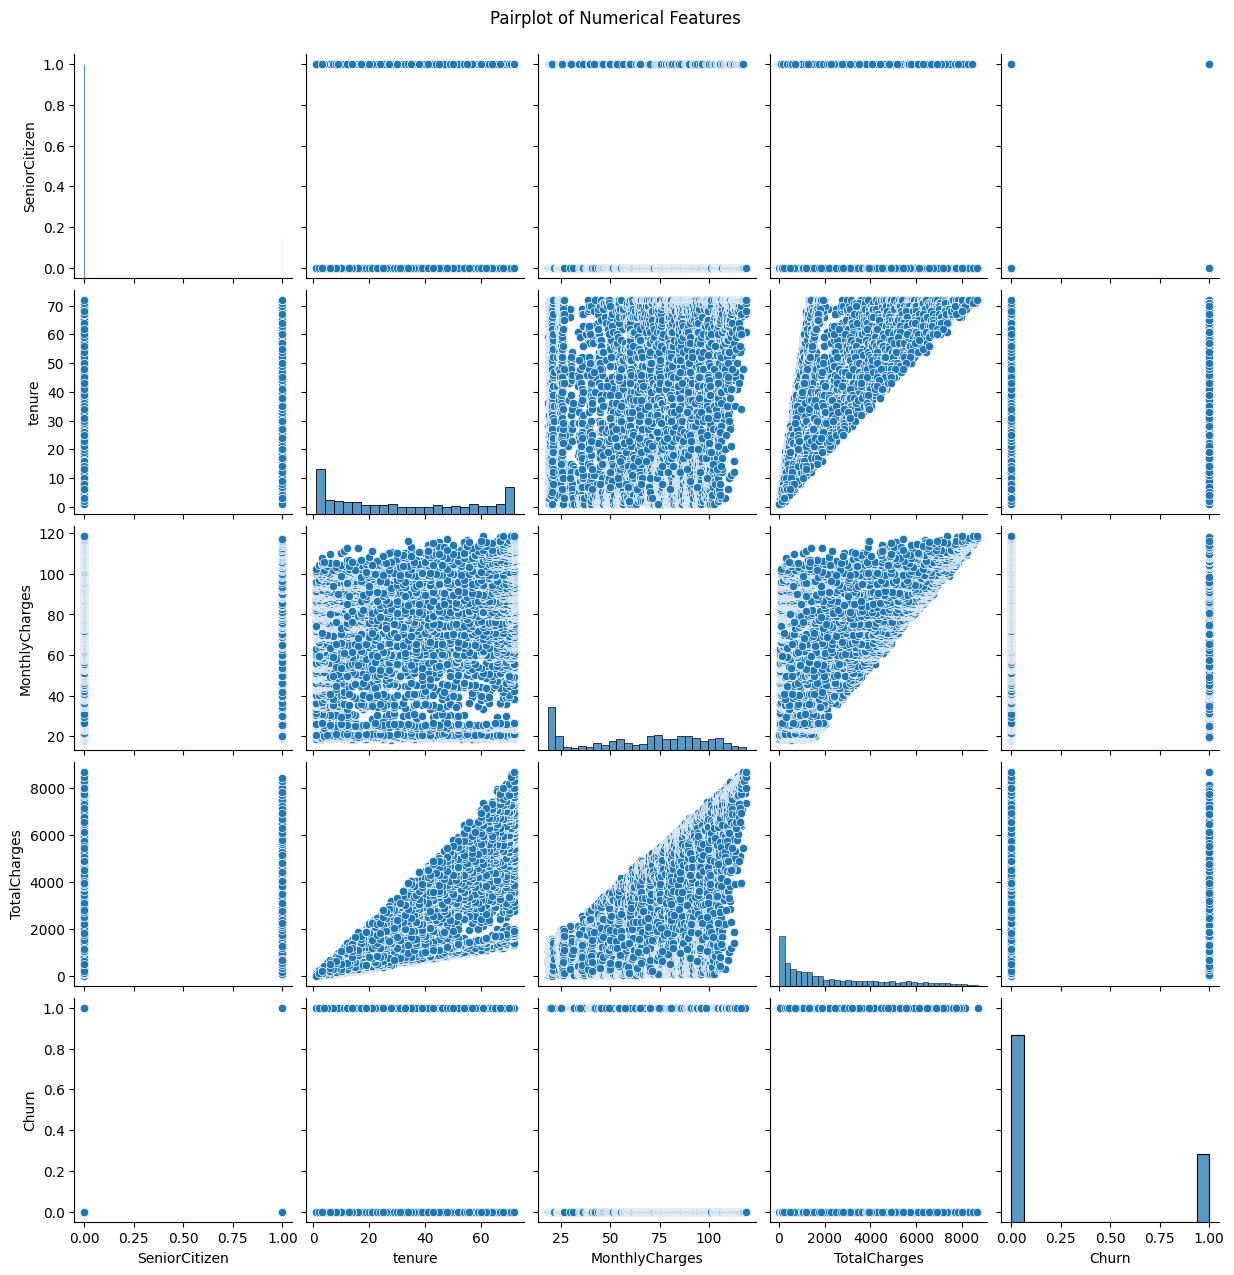

In [13]:
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [14]:
for col in categorical_features:
    if col != 'Churn':
        print(f"Relationship between {col} and Churn:")
        display(pd.crosstab(df[col], df['Churn'], normalize='index') * 100)
        print('-' * 40)

Relationship between gender and Churn:


Churn,0,1
gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


----------------------------------------
Relationship between Partner and Churn:


Churn,0,1
Partner,,
No,67.023908,32.976092
Yes,80.282935,19.717065


----------------------------------------
Relationship between Dependents and Churn:


Churn,0,1
Dependents,,
No,68.720860,31.279140
Yes,84.468795,15.531205


----------------------------------------
Relationship between PhoneService and Churn:


Churn,0,1
PhoneService,,
No,75.000000,25.000000
Yes,73.252519,26.747481


----------------------------------------
Relationship between MultipleLines and Churn:


Churn,0,1
MultipleLines,,
No,74.918759,25.081241
No phone service,75.000000,25.000000
Yes,71.351534,28.648466


----------------------------------------
Relationship between InternetService and Churn:


Churn,0,1
InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


----------------------------------------
Relationship between OnlineSecurity and Churn:


Churn,0,1
OnlineSecurity,,
No,58.221333,41.778667
No internet service,92.565789,7.434211
Yes,85.359801,14.640199


----------------------------------------
Relationship between OnlineBackup and Churn:


Churn,0,1
OnlineBackup,,
No,60.058309,39.941691
No internet service,92.565789,7.434211
Yes,78.432990,21.567010


----------------------------------------
Relationship between DeviceProtection and Churn:


Churn,0,1
DeviceProtection,,
No,60.859729,39.140271
No internet service,92.565789,7.434211
Yes,77.460711,22.539289


----------------------------------------
Relationship between TechSupport and Churn:


Churn,0,1
TechSupport,,
No,58.352535,41.647465
No internet service,92.565789,7.434211
Yes,84.803922,15.196078


----------------------------------------
Relationship between StreamingTV and Churn:


Churn,0,1
StreamingTV,,
No,66.464934,33.535066
No internet service,92.565789,7.434211
Yes,69.885313,30.114687


----------------------------------------
Relationship between StreamingMovies and Churn:


Churn,0,1
StreamingMovies,,
No,66.271125,33.728875
No internet service,92.565789,7.434211
Yes,70.047602,29.952398


----------------------------------------
Relationship between Contract and Churn:


Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


----------------------------------------
Relationship between PaperlessBilling and Churn:


Churn,0,1
PaperlessBilling,,
No,83.624302,16.375698
Yes,66.410749,33.589251


----------------------------------------
Relationship between PaymentMethod and Churn:


Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


----------------------------------------


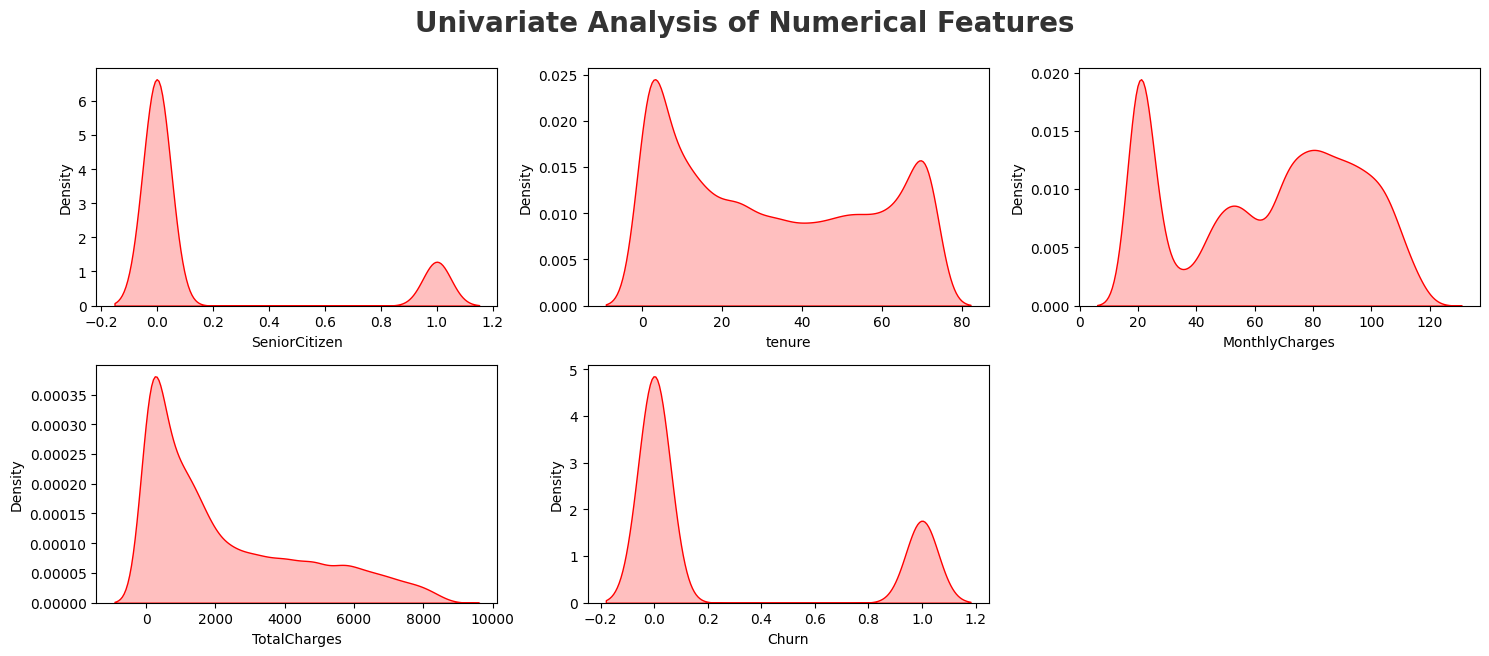

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], fill=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

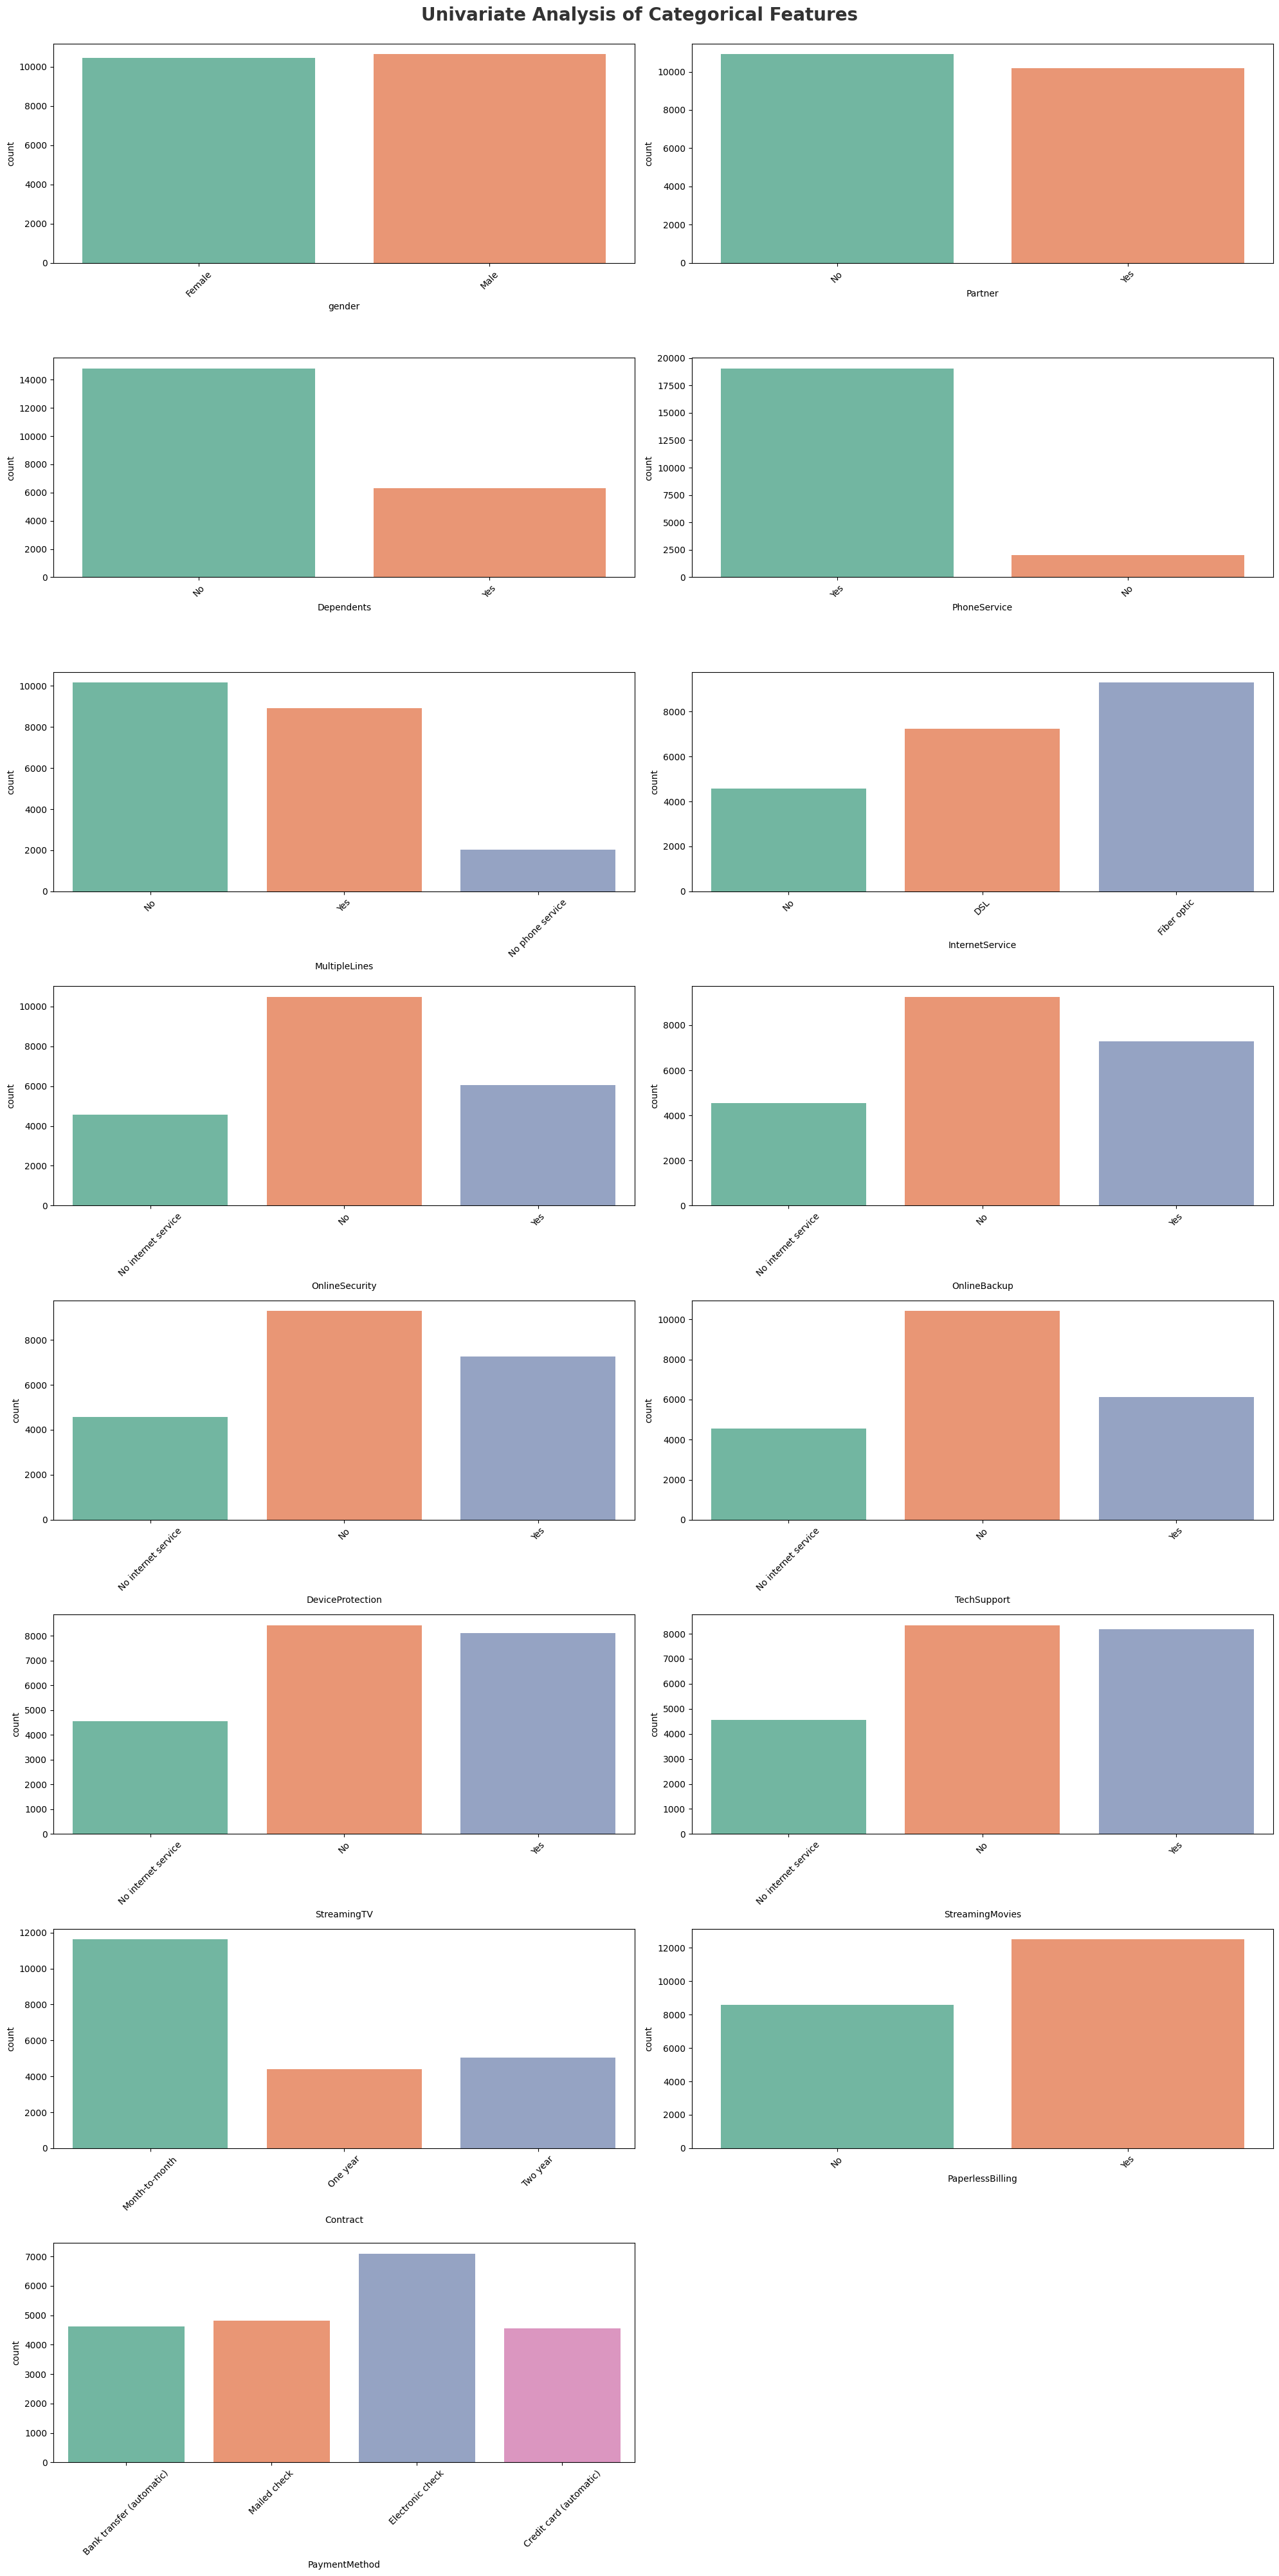

In [16]:
plt.figure(figsize=(20, 40))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(8, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

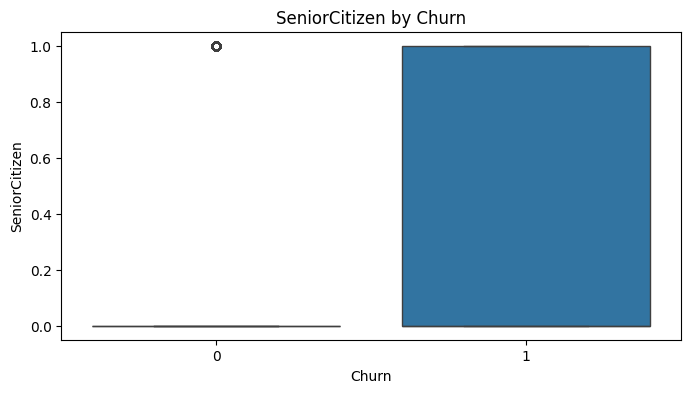

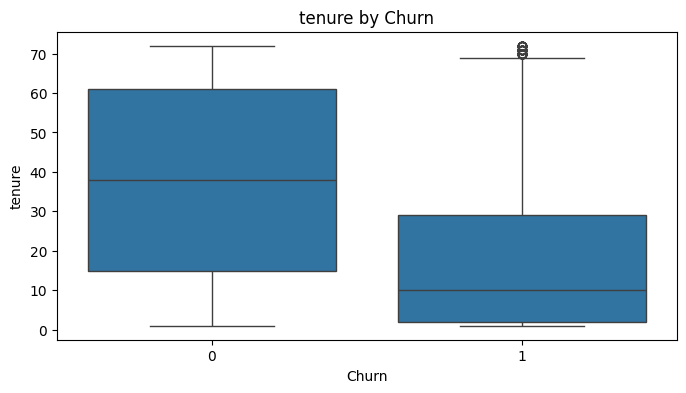

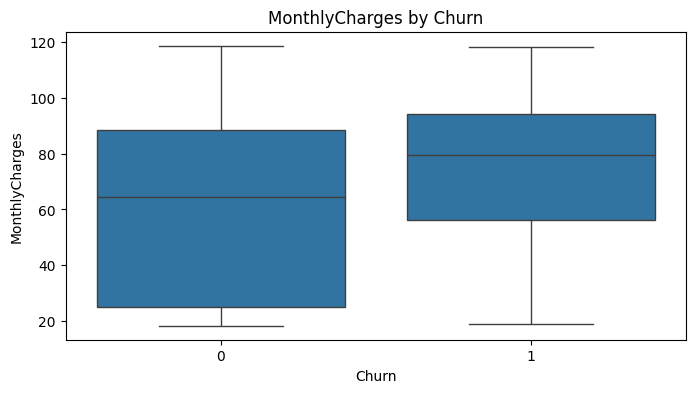

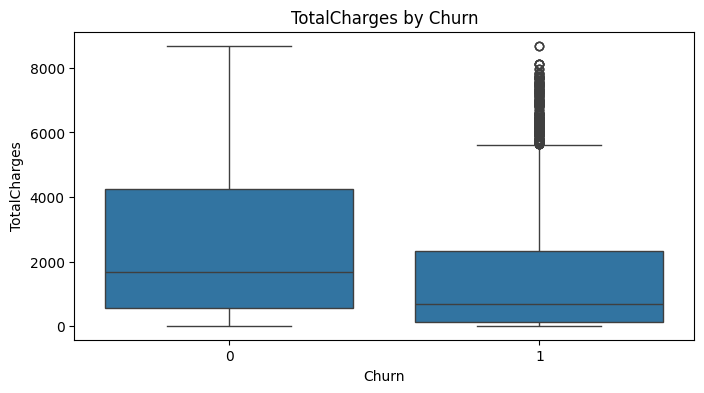

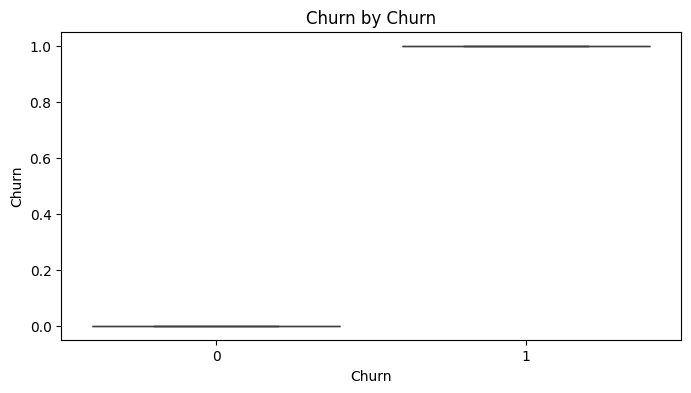

In [17]:
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

In [18]:
## Encoding the target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),18.75,53.15,NaN
1,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,56.00,NaN
2,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25,NaN
3,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,NaN
4,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.20,NaN


In [20]:
df.to_csv("../Data/Telco-Customer-Churn-cleaned.csv", index=False)